<a href="https://colab.research.google.com/github/SreekarBasa/Digit_Recognizer/blob/main/digit_recognizer_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image

In [22]:
train_data = pd.read_csv('/content/train.csv')
train = train_data.values
x_train = train[:,1:]
print(np.shape(x_train))
x_train = tf.reshape(x_train, (42000,28,28,1))

(42000, 784)


In [9]:
y_train_orig = train[:,0]
y_train = tf.one_hot(y_train_orig,depth=10)
y_train = tf.cast(y_train,dtype=tf.int64)

In [23]:
test_data = pd.read_csv('/content/test.csv')
x_test = test_data.values
x_test = tf.reshape(x_test, (28000,28,28,1))

In [12]:
lr = 0.001

In [ ]:
# (28,28)=>32 filters same 3*3 s=1 =>max pool 2*2 s=2 => another block

In [39]:
model = tf.keras.Sequential()
model.add(tfl.Conv2D(filters=32,
                     kernel_size=(3,3),               # CONV LAYER1
                     strides=1,
                     padding='same',
                     activation='relu'))
model.add(tfl.MaxPooling2D(pool_size=(2,2),
                           strides=2,                 # MAXPOOL LAYER 1(AVERAGE)
                           padding='valid'))

model.add(tfl.Conv2D(filters=64,
                     kernel_size=(3,3),
                     strides=1,                       # CONV LAYER 2
                     padding='same',
                     activation='relu'))
model.add(tfl.MaxPooling2D(pool_size=(2,2),
                           strides=2,                 # MAXPOOL LAYER 1(AVERAGE)
                           padding='valid'))
model.add(tfl.Dropout(0.2))
model.add(tfl.Flatten())
model.add(tfl.Dense(256,activation='relu'))
model.add(tfl.Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
model.build((None,28,28,1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 3136)             

In [26]:
print(train.shape)
print("x_train shape: "+str(x_train.shape)) # this shows 40k test cases
print("y_train shape: "+str(y_train.shape))
# print("x_cv shape: "+str(x_cv.shape))
# print("y_cv shape: "+str(y_cv.shape))
print("x_test shape: "+str(x_test.shape)) # this shows 28K test cases

(42000, 785)
x_train shape: (42000, 28, 28, 1)
y_train shape: (42000, 10)
x_test shape: (28000, 28, 28, 1)


In [41]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 67s 50ms/step - loss: 0.0611 - accuracy: 0.9439
Epoch 2/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0138 - accuracy: 0.9821
Epoch 3/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0102 - accuracy: 0.9862
Epoch 4/10
1313/1313 [==============================] - 62s 48ms/step - loss: 0.0084 - accuracy: 0.9882
Epoch 5/10
1313/1313 [==============================] - 64s 48ms/step - loss: 0.0068 - accuracy: 0.9910
Epoch 6/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0064 - accuracy: 0.9909
Epoch 7/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0055 - accuracy: 0.9927
Epoch 8/10
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0048 - accuracy: 0.9938
Epoch 9/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0045 - accuracy: 0.9938
Epoch 10/10
1313/1313 [==============================] - 65s 50m

In [42]:
y_pred_softmax = model.predict(x_test)
y_pred = tf.argmax(y_pred_softmax,axis=1)

875/875 [==============================] - 12s 14ms/step


In [43]:
mnist_data = pd.read_csv('/content/sample_data/mnist_test.csv')
test = mnist_data.values
x_mnist = test[:,1:]
print(x_mnist.shape)
x_mnist = tf.reshape(x_mnist, (9999,28,28,1))
y_mnist_orig = test[:,0]
y_mnist = tf.one_hot(y_mnist_orig,depth=10)

(9999, 784)


In [44]:
model.evaluate(x_mnist,y_mnist)

313/313 [==============================] - 4s 13ms/step - loss: 0.0032 - accuracy: 0.9966


[0.0032273379620164633, 0.9965996742248535]

In [47]:
y_test = y_pred.numpy()
output = pd.DataFrame(y_test)
output.to_csv('testcnn2.csv',index=False)

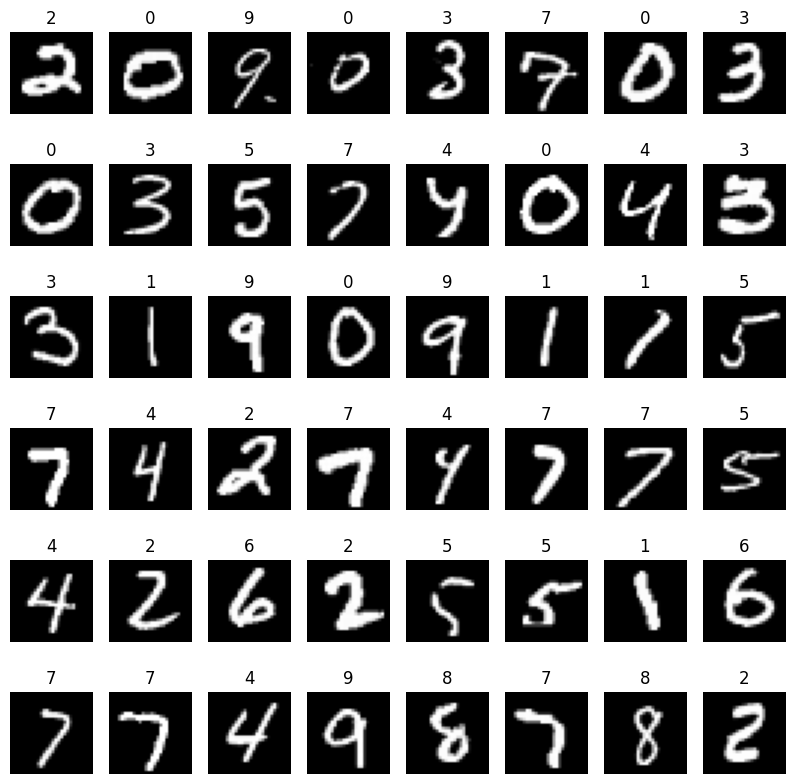

In [46]:
images_iter = iter(x_test)
labels_iter = iter(y_pred)
plt.figure(figsize=(10, 10))
for i in range(48):
    ax = plt.subplot(6, 8, i + 1)
    img = x_test[i]
    plt.imshow(img, cmap='gray')
    plt.title(int(y_pred[i]))
    plt.axis("off")